In [11]:
# first install Camelot pdf toolkit
! pip install camelot-py

In [12]:
# installing the dependencies, which include Tkinter and ghostscript
! pip install camelot-py[cv]

In [13]:
! sudo apt install -y python-tk ghostscript

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ghostscript is already the newest version (9.26~dfsg+0-0ubuntu0.16.04.3).
python-tk is already the newest version (2.7.12-1~16.04).
0 upgraded, 0 newly installed, 0 to remove and 17 not upgraded.


In [14]:
! sudo apt install -y python3-tk ghostscript

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ghostscript is already the newest version (9.26~dfsg+0-0ubuntu0.16.04.3).
Suggested packages:
  tix python3-tk-dbg
The following NEW packages will be installed:
  python3-tk
0 upgraded, 1 newly installed, 0 to remove and 17 not upgraded.
Need to get 25.1 kB of archives.
After this operation, 89.1 kB of additional disk space will be used.
Get:1 http://us-east-2.ec2.archive.ubuntu.com/ubuntu xenial/main amd64 python3-tk amd64 3.5.1-1 [25.1 kB]
Fetched 25.1 kB in 0s (249 kB/s)

78Selecting previously unselected package python3-tk.
(Reading database ... 84611 files and directories currently installed.)
Preparing to unpack .../python3-tk_3.5.1-1_amd64.deb ...
7Progress: [  0%] [..........................................................] 87Progress: [ 16%] [##########................................................] 8Unpacking python3-tk (3.5.1-1) ...
7Progress: [ 33%] [####################

In [2]:
import pandas as pd

In [19]:
!pip install opencv-python

In [21]:
!sudo apt update && sudo apt install -y libsm6 libxext6

Hit:1 http://us-east-2.ec2.archive.ubuntu.com/ubuntu xenial InRelease
Hit:2 http://us-east-2.ec2.archive.ubuntu.com/ubuntu xenial-updates InRelease
Hit:3 http://us-east-2.ec2.archive.ubuntu.com/ubuntu xenial-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu xenial-security InRelease              
Reading package lists... Done
Building dependency tree       
Reading state information... Done
All packages are up to date.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libxext6 is already the newest version (2:1.3.3-1).
The following NEW packages will be installed:
  libice6 libsm6
0 upgraded, 2 newly installed, 0 to remove and 0 not upgraded.
Need to get 55.0 kB of archives.
After this operation, 200 kB of additional disk space will be used.
Get:1 http://us-east-2.ec2.archive.ubuntu.com/ubuntu xenial/main amd64 libice6 amd64 2:1.0.9-1 [39.2 kB]
Get:2 http://us-east-2.ec2.archive.ubuntu.com/ubuntu xenial/main amd64 libsm6 amd64 2:1

In [3]:
import camelot

In [5]:
!ls -l

total 3956
-rw-rw-r-- 1 ubuntu ubuntu  411180 Jan  9 15:49 4Q18-renewals-BE.csv
-rw-rw-r-- 1 ubuntu ubuntu  544264 Jan  9 15:49 4Q18-renewals-NL.csv
-rw-rw-r-- 1 ubuntu ubuntu 1641746 Jan 15 09:50 atc-icd-mialist.csv
-rw-rw-r-- 1 ubuntu ubuntu   13231 Jan 15 16:33 pdf_scrape_geneesmiddelen_data.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  969048 Jan 11 20:46 RenewalsProjectQ42018.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  323945 Jan 11 08:30 report.html
-rw-rw-r-- 1 ubuntu ubuntu   24022 Jan 15 13:30 statistiek_farma_voorschrijvers_1110_1999.pdf
-rw-rw-r-- 1 ubuntu ubuntu  108164 Jan 15 12:57 webscrape_MIA.ipynb


In [27]:
tables = camelot.read_pdf('foo.pdf')

In [28]:
tables

<TableList n=1>

In [29]:
tables.export('foo.csv', f='csv', compress=True)    # json, excel, html

In [30]:
tables[0]

<Table shape=(7, 7)>

In [31]:
#tables[0].__dict__

In [32]:
tables[0].parsing_report

{'accuracy': 99.02, 'order': 1, 'page': 1, 'whitespace': 12.24}

In [33]:
tables[0].to_csv('foo.csv')                         # to_json, to_excel, to_html

In [34]:
tables[0].df                                        # get a pandas DataFrame!

,0,1,2,3,4,5,6
0,Cycle \nName,KI \n(1/km),Distance \n(mi),Percent Fuel Savings,,,
1,,,,Improved \nSpeed,Decreased \nAccel,Eliminate \nStops,Decreased \nIdle
2,2012_2,3.30,1.3,5.9%,9.5%,29.2%,17.4%
3,2145_1,0.68,11.2,2.4%,0.1%,9.5%,2.7%
4,4234_1,0.59,58.7,8.5%,1.3%,8.5%,3.3%
5,2032_2,0.17,57.8,21.7%,0.3%,2.7%,1.2%
6,4171_1,0.07,173.9,58.1%,1.6%,2.1%,0.5%


### We need to try a different pdf and find out how to get the table data out correctly

In [3]:
import camelot
import pandas as pd

In [100]:
# load the pdf file
# flavor        : use 'stream' method instead of (default 'lattice')
# flag size     : enclose superscript characters like the 2 in '5.33²'
# strip_text    : strip unwanted characters like spaces, dots and newlines
# table_areas   : table_areas=['316,499,566,337'] being [top left & bottom right]
# table_regions : table_regions=['170,370,560,270'] for approximate region
# pages         : (default 1) pages=1,4-10,20-end  

tables = camelot.read_pdf('statistiek_farma_voorschrijvers_1110_2017.pdf', pages="4,5",
                          flavor='stream', flag_size=True, strip_text=' .\n')

In [101]:
tables

<TableList n=2>

In [102]:
for i in range(len(tables)):
    print (tables[i])

<Table shape=(59, 7)>
<Table shape=(32, 7)>


In [103]:
for i in range(len(tables)):
    print(tables[i].parsing_report)

{'order': 1, 'page': 4, 'whitespace': 22.03, 'accuracy': 99.96}
{'order': 1, 'page': 5, 'whitespace': 23.21, 'accuracy': 100.0}


In [104]:
tables[0].df

,0,1,2,3,4,5,6
0,Plaats in,ATC 4de,ATC 5de,Werkzaam bestanddeel,Bruto‐,% van het,Aantal
1,de DU,niveau,niveau,,bedrag,brutobedrag,DDD
2,90%,,,,(duiz.,van alle,(duiz.)
3,,,,,EURO),geneesheren,
4,1,N03AX,N03AX16,PREGABALINE,421,"2,9%","442,5"
5,,,N03AX12,GABAPENTINE,97,"2,3%","77,6"
6,,,N03AX14,LEVETIRACETAM,14,"0,1%","10,1"
7,,,N03AX11,TOPIRAMAAT,11,"0,3%","5,6"
8,,,N03AX09,LAMOTRIGINE,10,"0,1%","6,0"
9,,,N03AX18,LACOSAMIDE,3,"0,1%","0,6"


In [75]:
# ‘text’
# ‘grid’
# ‘contour’
# ‘line’     (only lattice)
# ‘joint’    (only lattice)
# ‘textedge’ (only stream)

#camelot.plot(tables[0], kind='...')
#plt.show()
from matplotlib import pyplot as plt

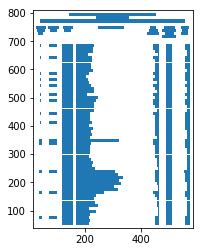

In [97]:
camelot.plot(tables[0], kind='text')
plt.savefig('stat_text.png', dpi=400, quality=95)
plt.show()

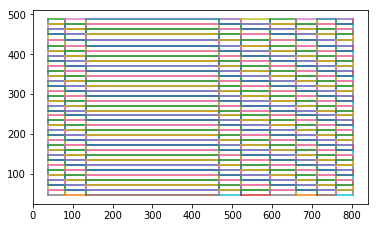

In [78]:
camelot.plot(tables[0], kind='grid')
plt.savefig('stat_grid.png', dpi=400, quality=95)
plt.show()

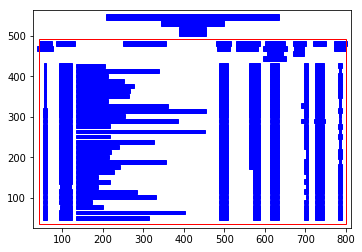

In [79]:
camelot.plot(tables[0], kind='contour')
plt.savefig('stat_contour.png', dpi=400, quality=95)
plt.show()

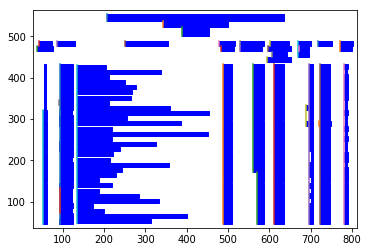

In [80]:
camelot.plot(tables[0], kind='textedge')
plt.savefig('stat_textedge.png', dpi=400, quality=95)
plt.show()

In [81]:
table1 = tables[0].df

In [82]:
type(table1)

pandas.core.frame.DataFrame